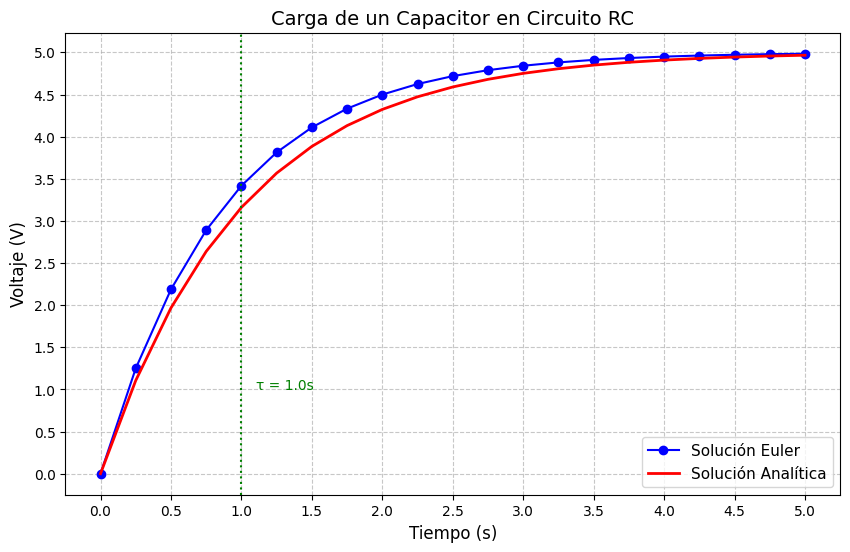


Tabla de resultados (primeras 5 filas):
   Tiempo (s)  Voltaje Euler (V)  Voltaje Analítico (V)  Error Absoluto (V)
0        0.00           0.000000               0.000000            0.000000
1        0.25           1.250000               1.105996            0.144004
2        0.50           2.187500               1.967347            0.220153
3        0.75           2.890625               2.638167            0.252458
4        1.00           3.417969               3.160603            0.257366


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parámetros del circuito RC
R = 1000  # Resistencia en Ohmios
C = 0.001  # Capacitancia en Faradios
V_fuente = 5  # Voltaje de fuente en Voltios
tau = R * C  # Constante de tiempo RC

# Definición de la EDO: dV/dt = (V_fuente - V)/(R*C)
def f(t, V):
    return (V_fuente - V)/(R*C)

# Condiciones iniciales
t0 = 0
V0 = 0
tf = 5  # 5 segundos
n = 20  # Número de pasos

# Paso de tiempo
h = (tf - t0)/n

# Inicialización de arrays para almacenar resultados
t_vals = np.zeros(n+1)
V_euler = np.zeros(n+1)
V_analitica = np.zeros(n+1)

# Condiciones iniciales
t_vals[0] = t0
V_euler[0] = V0
V_analitica[0] = V0

# Método de Euler
for i in range(n):
    t = t_vals[i]
    V = V_euler[i]
    V_euler[i+1] = V + h * f(t, V)
    t_vals[i+1] = t + h
    # Solución analítica
    V_analitica[i+1] = V_fuente * (1 - np.exp(-t_vals[i+1]/tau))

# Crear DataFrame con los resultados
data = {
    "Tiempo (s)": t_vals,
    "Voltaje Euler (V)": V_euler,
    "Voltaje Analítico (V)": V_analitica,
    "Error Absoluto (V)": np.abs(V_analitica - V_euler)
}
df = pd.DataFrame(data)

# Guardar resultados en CSV
csv_path = "carga_capacitor_euler.csv"
df.to_csv(csv_path, index=False)

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(t_vals, V_euler, 'bo-', label='Solución Euler', markersize=6)
plt.plot(t_vals, V_analitica, 'r-', label='Solución Analítica', linewidth=2)
plt.title('Carga de un Capacitor en Circuito RC', fontsize=14)
plt.xlabel('Tiempo (s)', fontsize=12)
plt.ylabel('Voltaje (V)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=11)
plt.xticks(np.arange(0, 5.5, 0.5))
plt.yticks(np.arange(0, 5.5, 0.5))

# Añadir anotación de la constante de tiempo
plt.axvline(x=tau, color='g', linestyle=':', label='τ = RC = 1s')
plt.text(tau+0.1, 1, f'τ = {tau}s', color='g')

image_path = "carga_capacitor_comparacion.png"
plt.savefig(image_path, dpi=300, bbox_inches='tight')
plt.show()

# Mostrar tabla de resultados
print("\nTabla de resultados (primeras 5 filas):")
print(df.head())

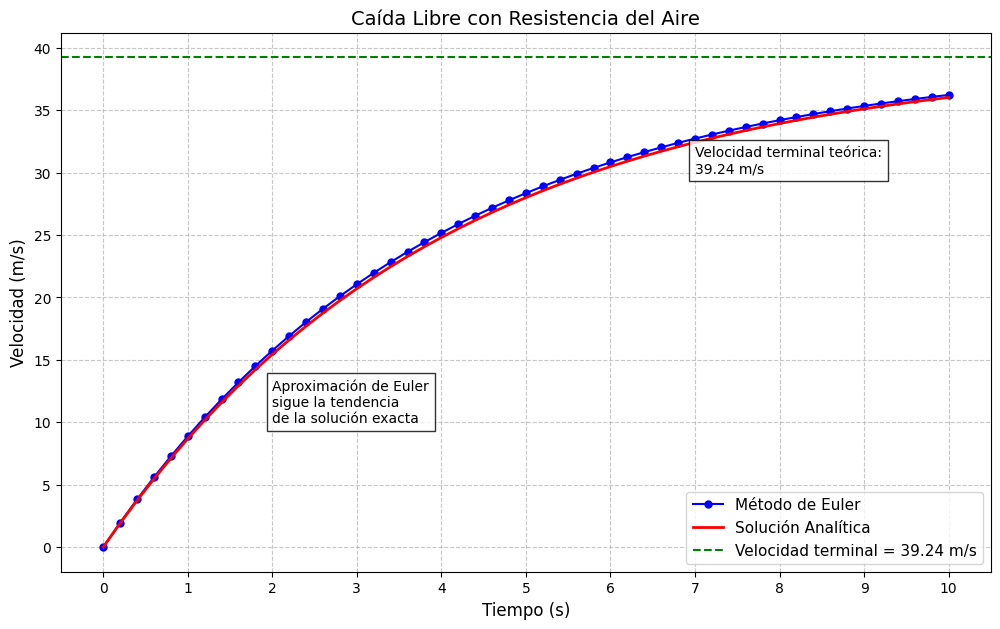


Estadísticas del error:
Error máximo: 0.3686 m/s
Error promedio: 0.2809 m/s

Primeras 5 filas de resultados:
   Tiempo (s)  Velocidad Euler (m/s)  Velocidad Analítica (m/s)  \
0         0.0               0.000000                   0.000000   
1         0.2               1.962000                   1.913757   
2         0.4               3.825900                   3.734180   
3         0.6               5.596605                   5.465819   
4         0.8               7.278775                   7.113005   

   Error Absoluto (m/s)  
0              0.000000  
1              0.048243  
2              0.091720  
3              0.130786  
4              0.165770  


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parámetros físicos
g = 9.81  # Aceleración gravitacional (m/s²)
m = 2.0   # Masa del objeto (kg)
k = 0.5   # Coeficiente de fricción lineal (kg/s)
v_terminal = m * g / k  # Velocidad terminal teórica

# Definición de la EDO: dv/dt = g - (k/m)*v
def f(t, v):
    return g - (k/m) * v

# Condiciones iniciales
t0 = 0
v0 = 0
tf = 10  # 10 segundos
n = 50   # Número de pasos

# Paso de tiempo
h = (tf - t0)/n

# Inicialización de arrays
t_vals = np.zeros(n+1)
v_euler = np.zeros(n+1)
v_analitica = np.zeros(n+1)

# Condiciones iniciales
t_vals[0] = t0
v_euler[0] = v0
v_analitica[0] = v0

# Método de Euler
for i in range(n):
    t = t_vals[i]
    v = v_euler[i]
    v_euler[i+1] = v + h * f(t, v)
    t_vals[i+1] = t + h
    # Solución analítica
    v_analitica[i+1] = (m*g/k) * (1 - np.exp(-(k/m)*t_vals[i+1]))

# Crear DataFrame con resultados
data = {
    "Tiempo (s)": t_vals,
    "Velocidad Euler (m/s)": v_euler,
    "Velocidad Analítica (m/s)": v_analitica,
    "Error Absoluto (m/s)": np.abs(v_analitica - v_euler)
}
df = pd.DataFrame(data)

# Guardar resultados
csv_path = "caida_libre_resistencia.csv"
df.to_csv(csv_path, index=False)

# Gráfico comparativo
plt.figure(figsize=(12, 7))
plt.plot(t_vals, v_euler, 'bo-', markersize=5, label='Método de Euler')
plt.plot(t_vals, v_analitica, 'r-', linewidth=2, label='Solución Analítica')
plt.axhline(y=v_terminal, color='g', linestyle='--',
            label=f'Velocidad terminal = {v_terminal:.2f} m/s')

# Configuración del gráfico
plt.title('Caída Libre con Resistencia del Aire', fontsize=14)
plt.xlabel('Tiempo (s)', fontsize=12)
plt.ylabel('Velocidad (m/s)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=11, loc='lower right')
plt.xticks(np.arange(0, 11, 1))
plt.yticks(np.arange(0, 45, 5))

# Añadir anotaciones importantes
plt.text(7, 30, f'Velocidad terminal teórica:\n{v_terminal:.2f} m/s',
         bbox=dict(facecolor='white', alpha=0.8))
plt.text(2, 10, 'Aproximación de Euler\nsigue la tendencia\nde la solución exacta',
         bbox=dict(facecolor='white', alpha=0.8))

plt.savefig("caida_libre_comparacion.png", dpi=300, bbox_inches='tight')
plt.show()

# Mostrar estadísticas del error
print("\nEstadísticas del error:")
print(f"Error máximo: {df['Error Absoluto (m/s)'].max():.4f} m/s")
print(f"Error promedio: {df['Error Absoluto (m/s)'].mean():.4f} m/s")
print("\nPrimeras 5 filas de resultados:")
print(df.head())

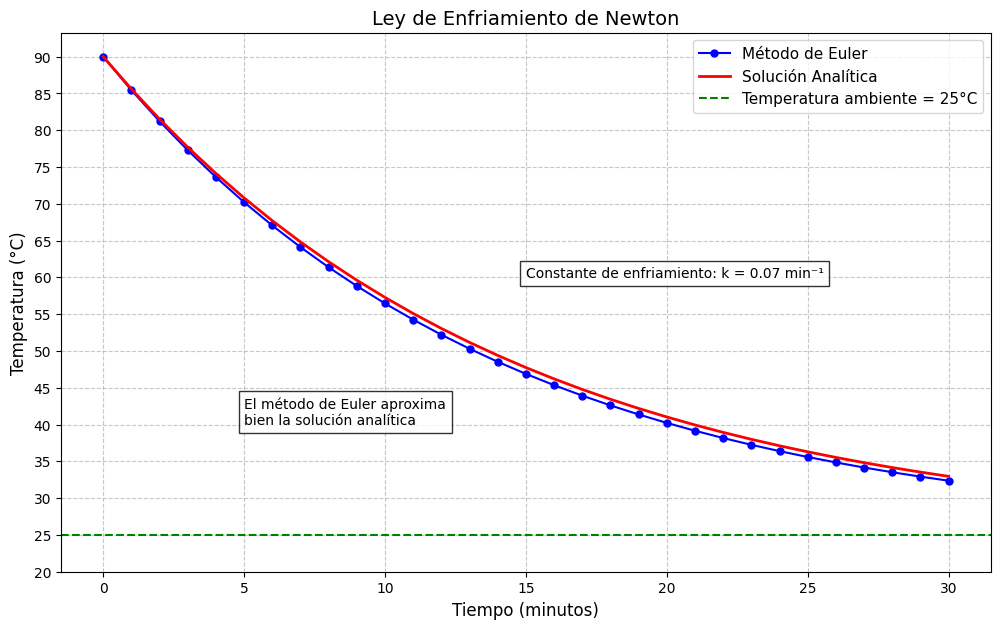


Estadísticas del error:
Error máximo: 0.8624 °C
Error promedio: 0.6775 °C

Primeras 5 filas de resultados:
   Tiempo (min)  Temperatura Euler (°C)  Temperatura Analítica (°C)  \
0           0.0               90.000000                   90.000000   
1           1.0               85.450000                   85.605598   
2           2.0               81.218500                   81.508285   
3           3.0               77.283205                   77.687976   
4           4.0               73.623381                   74.125943   

   Error Absoluto (°C)  
0             0.000000  
1             0.155598  
2             0.289785  
3             0.404771  
4             0.502563  


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parámetros del modelo
T0 = 90       # Temperatura inicial (°C)
Tamb = 25     # Temperatura ambiente (°C)
k = 0.07      # Constante de enfriamiento (1/minutos)

# Definición de la EDO: dT/dt = -k(T - Tamb)
def f(t, T):
    return -k * (T - Tamb)

# Condiciones de simulación
t0 = 0
tf = 30  # 30 minutos
n = 30   # Número de pasos
h = (tf - t0)/n  # Paso temporal

# Inicialización de arrays
t_vals = np.zeros(n+1)
T_euler = np.zeros(n+1)
T_analitica = np.zeros(n+1)

# Condiciones iniciales
t_vals[0] = t0
T_euler[0] = T0
T_analitica[0] = T0

# Método de Euler
for i in range(n):
    t = t_vals[i]
    T = T_euler[i]
    T_euler[i+1] = T + h * f(t, T)
    t_vals[i+1] = t + h
    # Solución analítica
    T_analitica[i+1] = Tamb + (T0 - Tamb) * np.exp(-k * t_vals[i+1])

# Crear DataFrame con resultados
data = {
    "Tiempo (min)": t_vals,
    "Temperatura Euler (°C)": T_euler,
    "Temperatura Analítica (°C)": T_analitica,
    "Error Absoluto (°C)": np.abs(T_analitica - T_euler)
}
df = pd.DataFrame(data)

# Guardar resultados
csv_path = "enfriamiento_newton.csv"
df.to_csv(csv_path, index=False)

# Gráfico comparativo
plt.figure(figsize=(12, 7))
plt.plot(t_vals, T_euler, 'bo-', markersize=5, label='Método de Euler')
plt.plot(t_vals, T_analitica, 'r-', linewidth=2, label='Solución Analítica')
plt.axhline(y=Tamb, color='g', linestyle='--',
            label=f'Temperatura ambiente = {Tamb}°C')

# Configuración del gráfico
plt.title('Ley de Enfriamiento de Newton', fontsize=14)
plt.xlabel('Tiempo (minutos)', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=11)
plt.xticks(np.arange(0, 31, 5))
plt.yticks(np.arange(20, 95, 5))

# Añadir anotaciones
plt.text(15, 60, f'Constante de enfriamiento: k = {k} min⁻¹',
         bbox=dict(facecolor='white', alpha=0.8))
plt.text(5, 40, 'El método de Euler aproxima\nbien la solución analítica',
         bbox=dict(facecolor='white', alpha=0.8))

plt.savefig("ley_enfriamiento_comparacion.png", dpi=300, bbox_inches='tight')
plt.show()

# Mostrar estadísticas del error
print("\nEstadísticas del error:")
print(f"Error máximo: {df['Error Absoluto (°C)'].max():.4f} °C")
print(f"Error promedio: {df['Error Absoluto (°C)'].mean():.4f} °C")
print("\nPrimeras 5 filas de resultados:")
print(df.head())